<a href="https://colab.research.google.com/github/MehtaManan07/ml-colab/blob/main/logistic%20regression/Titanic_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
train = pd.read_csv('titanic_train.csv')

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


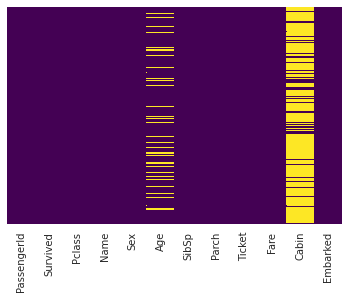

In [54]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [55]:
sns.set_style('whitegrid')

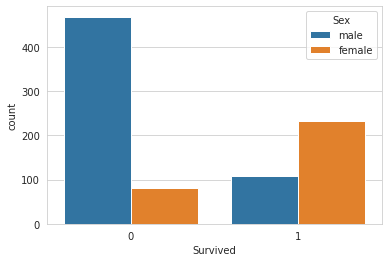

In [56]:
sns.countplot(x='Survived', hue='Sex', data=train)

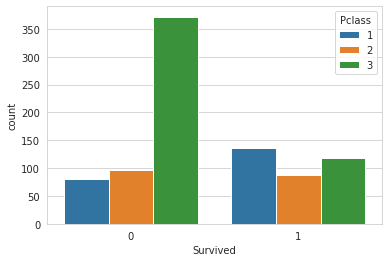

In [57]:
sns.countplot(x='Survived', hue='Pclass', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



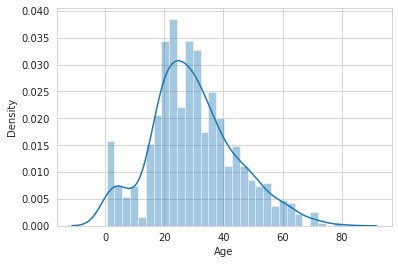

In [58]:
sns.distplot(train['Age'].dropna(), bins=30)

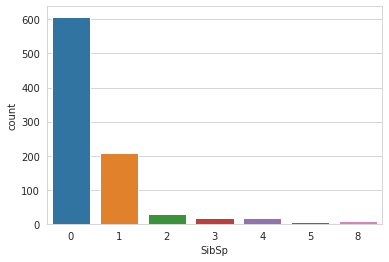

In [59]:
sns.countplot(data=train, x='SibSp')

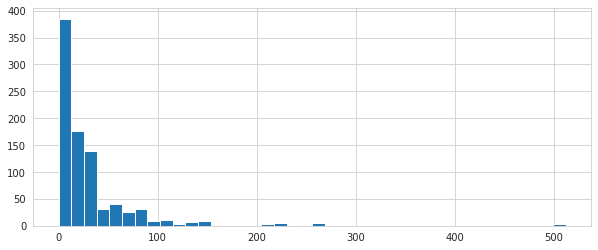

In [60]:
train['Fare'].hist(figsize=(10,4), bins=40)

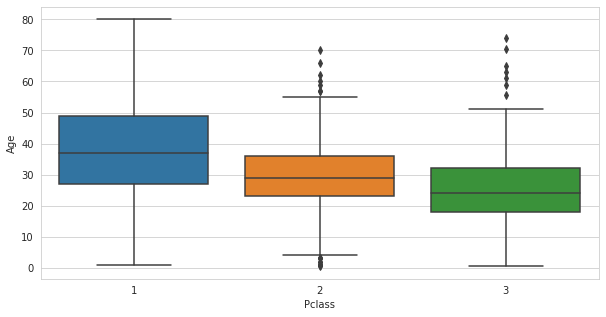

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age', data=train)

In [62]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if(Pclass == 1):
            return 37
        elif (Pclass == 2):
            return 29
        else:
            return 24
    else:
        return Age


In [63]:
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

In [64]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [65]:
# Now as in cabin, there is a lot of missing stuff, we can drop it
train.drop('Cabin',axis=1,inplace=True)

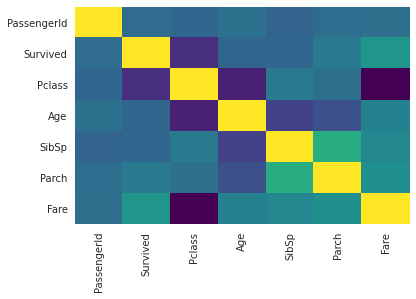

In [66]:
sns.heatmap(data=train.corr(), cbar=False, cmap='viridis')

In [67]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [68]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
train = pd.concat([train,sex,embark], axis=1)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [73]:
train.drop(['Embarked','Sex','Name','Ticket','PassengerId'], axis=1,inplace=True)

In [74]:
train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#Actual Predictions

In [75]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [77]:
from sklearn.model_selection import  train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [79]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [80]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
predictions = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[133  21]
 [ 38  76]]
